### Using the data from 2016-01-01 to 2019-10-01 (note you should have all data on one single dataframe, no multiple data frames) do the following:
### 0) Show all your code to acquire the dataset in your notebook. If you fail to show how you acquired the dataset, you will earn a zero on the assignment.

In [3]:
import requests
import pandas as pd
import io

In [4]:
import datetime
import time
from datetime import timedelta


def Split_date_intervals(begin,end,intervals):
    date_list = [begin.strftime('%Y-%m-%d')]
    delta = ((end - begin)/intervals)
    for i in range(1, intervals+1):
        date_list.append((begin+i*delta).strftime('%Y-%m-%d'))
        if((begin+i*delta) < end):
            date_list.append(((begin+i*delta)+timedelta(days=0)).strftime('%Y-%m-%d'))
    return date_list

def Get_data(begin,end,url):
    mainDataDF=pd.DataFrame()
    urlData = requests.get(url)
    if(urlData.status_code==200):
        urlData=urlData.content
        rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')))
        mainDataDF.append(rawData)
        return mainDataDF
    elif(urlData.status_code==400):
        dateList=Split_date_intervals(begin,end,4)
        for p in range(0,len(dateList),2):
            newBegin=dateList[p]
            newEnd=dateList[p+1]
            url="https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime="+newBegin+"&endtime="+newEnd+"&minmagnitude=4"
            urlData = requests.get(url)
            urlData=urlData.content
            rawData=pd.read_csv(io.StringIO(urlData.decode('utf-8')))
            mainDataDF=mainDataDF.append(rawData)
        return mainDataDF

begin = datetime.date(2016, 1, 1)
end = datetime.date(2019, 10, 2)
url="https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime="+begin.strftime('%Y-%m-%d')+"&endtime="+end.strftime('%Y-%m-%d')+"&minmagnitude=4"
       
df=Get_data(begin,end,url)        

#Exporting the Data to a file to ensure the data is safe
export_csv = df.to_csv (r'data1.csv', index = None, header=True) 





### 1) Use describe to get the basic statistics of all the columns (5 points)

In [3]:
#reading from the Csv file
df=pd.read_csv('data.csv') 
#Filtering out data for earthquake ONLY
df=df[df['type']=="earthquake"]
df.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,52951.000000,52951.000000,52951.000000,52951.000000,337.000000,52106.000000,52061.000000,52951.000000,52509.000000,52951.000000,51236.000000,51377.000000
mean,1.884496,34.097971,94.245726,4.526338,47.314540,110.729301,3.713465,0.827352,8.754933,5.449794,0.121071,42.228449
std,28.964385,124.269491,147.875751,0.397909,35.342401,51.023876,4.737868,0.262186,3.650872,4.190647,0.065074,61.171552
min,-79.983700,-179.998600,-0.930000,4.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.518050,-74.364700,10.000000,4.300000,23.000000,73.000000,1.173000,0.650000,6.300000,1.900000,0.073000,12.000000
50%,-3.359300,94.025300,33.930000,4.500000,37.000000,106.000000,2.382000,0.810000,8.200000,4.800000,0.112000,21.000000
75%,24.318150,141.909950,106.190000,4.700000,64.000000,142.000000,4.399000,0.990000,10.800000,7.900000,0.153000,45.000000
max,86.996400,179.999300,690.950000,8.200000,289.000000,346.000000,62.626000,2.530000,51.700000,69.300000,1.000000,854.000000


### 2) Get the top 10 earthquakes by magnitude (5 points)

In [177]:

df.sort_values(by=['mag'], ascending=False).head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3244,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,...,2019-08-19T06:18:42.402Z,"286km NNE of Ndoi Island, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us
2864,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,2019-09-12T03:25:23.535Z,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us
4567,2019-05-26T07:41:15.073Z,-5.8119,-75.2697,122.57,8.0,mww,NaN,17.0,3.180,0.84,...,2019-10-20T00:29:23.662Z,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us
12232,2016-12-17T10:51:10.500Z,-4.5049,153.5216,94.54,7.9,mww,NaN,13.0,1.389,0.97,...,2018-10-17T21:50:55.380Z,"54km E of Taron, Papua New Guinea",earthquake,7.3,3.8,NaN,NaN,reviewed,us,us
10650,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,...,2018-10-17T21:53:19.164Z,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us
10811,2018-01-23T09:31:40.890Z,56.0039,-149.1658,14.06,7.9,mww,NaN,30.0,2.585,0.77,...,2019-07-01T15:34:15.502Z,"280km SE of Kodiak, Alaska",earthquake,6.0,2.8,0.034,81.0,reviewed,us,us
2156,2018-09-06T15:49:18.710Z,-18.4743,179.3502,670.81,7.9,mww,NaN,12.0,1.431,1.07,...,2019-04-23T04:45:27.592Z,"102km ESE of Suva, Fiji",earthquake,9.5,2.8,0.025,157.0,reviewed,us,us
11724,2016-03-02T12:49:48.110Z,-4.9521,94.3299,24.00,7.8,mww,NaN,20.0,7.009,1.14,...,2018-12-04T22:30:13.007Z,"Southwest of Sumatra, Indonesia",earthquake,7.5,1.8,NaN,NaN,reviewed,us,us
9915,2016-04-16T23:58:36.980Z,0.3819,-79.9218,20.59,7.8,mww,NaN,15.0,1.440,0.94,...,2019-10-15T14:06:57.770Z,"27km SSE of Muisne, Ecuador",earthquake,5.7,3.2,NaN,NaN,reviewed,us,us
1305,2016-11-13T11:02:56.340Z,-42.7373,173.0540,15.11,7.8,mww,NaN,21.0,0.481,0.56,...,2019-04-15T21:55:36.454Z,"54km NNE of Amberley, New Zealand",earthquake,4.6,3.2,NaN,NaN,reviewed,us,us


### 3) Handle all Null/empty data by filling it with zeros (10 points)

In [ ]:
df.isna().sum()
df=df.fillna(0)
print(df.isna().sum())

### 4) Find the top 10 places where the strongest earthquakes occurred (15 points)​ (Note: Place needs to be parsed nicely to remove the KM location from them. For example: 75km WSW of Illapel, Chile should look like Illapel, Chile).

In [180]:
topdf=df.sort_values(by=['mag'], ascending=False).head(10)['place'].to_frame()
topdf['place'] = topdf['place'].str.split(' of ').str[1]
topdf.reset_index(level=0, inplace=True)
topdf['place'].to_frame()



,place
0,"Ndoi Island, Fiji"
1,"Tres Picos, Mexico"
2,"Lagunas, Peru"
3,"Taron, Papua New Guinea"
4,"Panguna, Papua New Guinea"
5,"Kodiak, Alaska"
6,"Suva, Fiji"
7,"Sumatra, Indonesia"
8,"Muisne, Ecuador"
9,"Amberley, New Zealand"


### 5) Find the top 10 places where the weakest earthquakes occurred (15 points)​ ​(Note: Place needs to be parsed nicely to remove the KM location from them. For example: 75km WSW of Illapel, Chile should look like Illapel, Chile).


In [179]:
bottomdf=df.nsmallest(10, 'mag',keep='last')['place'].to_frame()#df.sort_values(by=['mag'], ascending=False).tail(10)#['place'].to_frame()
bottomdf['place'] = bottomdf['place'].str.split(' of ').str[1]
bottomdf.reset_index(level=0, inplace=True)
bottomdf['place'].to_frame()



,place
0,"Little Sitkin Island, Alaska"
1,"Aksu, China"
2,"Amukta Island, Alaska"
3,"Rengasdengklok, Indonesia"
4,"San Antonio de los Cobres, Argentina"
5,"Hachijo-jima, Japan"
6,"Atka, Alaska"
7,"Tanaga Volcano, Alaska"
8,"Agrihan, Northern Mariana Islands"
9,"Tofino, Canada"



## 6) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges:
* Group 1: [4,4.5), 
* Group 2: [4.5,5), 
* Group 3: [5,6), 
* Group 4: [6,7), 
* Group 5: (7,MAX]. 
#### Pay close attention to the group ranges. (20 points) Please add labels and colors to the plot.

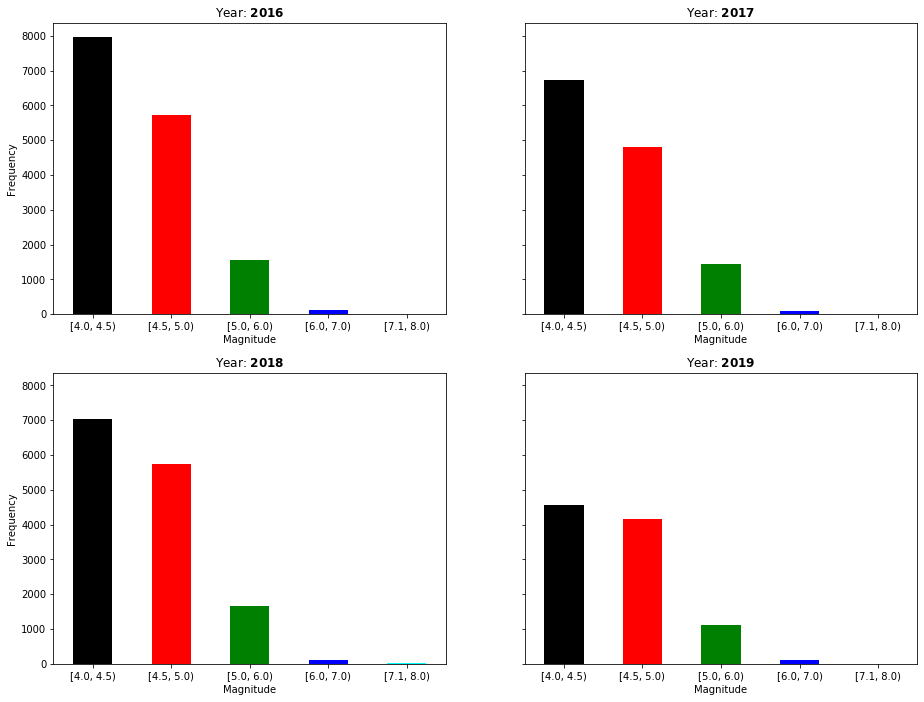

In [6]:
import matplotlib.pyplot as plt
import numpy as np

dfPlotTemp=df[['time', 'mag']] 
dfPlotTemp.insert(2,"Year",dfPlotTemp['time'].str[:4])
dfPlot=dfPlotTemp[['Year','mag']]


dfPlot2016= dfPlot.loc[dfPlot['Year'] == '2016']
dfPlot2017= dfPlot.loc[dfPlot['Year'] == '2017']
dfPlot2018= dfPlot.loc[dfPlot['Year'] == '2018']
dfPlot2019= dfPlot.loc[dfPlot['Year'] == '2019']


fig, ax = plt.subplots(2, 2,figsize=(15,10),sharey=True)


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.01, top=0.9)
cut_bins_1 = [4,4.5,5,6,7]
cut_bins_2 = [7.1,8]

dfPlot2016Bin1=pd.cut(dfPlot2016['mag'], bins=cut_bins_1,right=False)
dfPlot2016Bin2=pd.cut(dfPlot2016['mag'], bins=cut_bins_2,right=False)
dfPlot2016Bin=dfPlot2016Bin1.append(dfPlot2016Bin2).dropna()

ax[0, 0] = dfPlot2016Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[0,0])
ax[0, 0].set_title("Year: " + r"$\bf{" + str('2016') + "}$")
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_xlabel('Magnitude')

dfPlot2017Bin1=pd.cut(dfPlot2017['mag'], bins=cut_bins_1,right=False)
dfPlot2017Bin2=pd.cut(dfPlot2017['mag'], bins=cut_bins_2,right=False)
dfPlot2017Bin=dfPlot2017Bin1.append(dfPlot2017Bin2).dropna()
ax[0, 1] = dfPlot2017Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[0,1])
ax[0, 1].set_title("Year: " + r"$\bf{" + str('2017') + "}$")
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_xlabel('Magnitude')

dfPlot2018Bin1=pd.cut(dfPlot2018['mag'], bins=cut_bins_1,right=False)
dfPlot2018Bin2=pd.cut(dfPlot2018['mag'], bins=cut_bins_2,right=False)
dfPlot2018Bin=dfPlot2018Bin1.append(dfPlot2018Bin2).dropna()
ax[1, 0] = dfPlot2018Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[1,0])
ax[1, 0].set_title("Year: " + r"$\bf{" + str('2018') + "}$")
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_xlabel('Magnitude')

dfPlot2019Bin1=pd.cut(dfPlot2019['mag'], bins=cut_bins_1,right=False)
dfPlot2019Bin2=pd.cut(dfPlot2019['mag'], bins=cut_bins_2,right=False)
dfPlot2019Bin=dfPlot2019Bin1.append(dfPlot2019Bin2).dropna()
ax[1, 1] = dfPlot2019Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[1,1])
ax[1, 1].set_title("Year: " + r"$\bf{" + str('2019') + "}$")
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_xlabel('Magnitude')

plt.show()

## 7) Find the 10 countries with the highest number of earthquakes (30 points)​ (Note: Yes, this is only countries, not full place)

In [181]:
topdfCountries=df.sort_values(by=['mag'],ascending=False)['place'].to_frame()

tempdf=topdfCountries['place'].str.split(', ').str[1];
tempdf2=tempdf.fillna(topdfCountries['place'].str.split(' of ').str[1])
tempdf3=tempdf2.fillna(topdfCountries['place'])


topCountries=tempdf3.to_frame().\
        groupby(['place']).size().to_frame().\
        sort_values(by=[0], ascending=False).head(10)\
        
        
topCountries.reset_index(level=0, inplace=True)
topCountries['place'].to_frame()

,place
0,Indonesia
1,Japan
2,Papua New Guinea
3,Fiji
4,New Zealand
5,Chile
6,Philippines
7,Alaska
8,Russia
9,Tonga


### 8) Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) Please add labels and colors to the plot.

In this plot we can see the relationship between earthquake frquency and magnitude are <b>right skewed</b>.I basically means that the most data we have are for magnitude 4 and we have less data for magnitude 8 or as we increase the intensity.
This make sense since there will be more frequency for minor earthquakes rather than major ones.

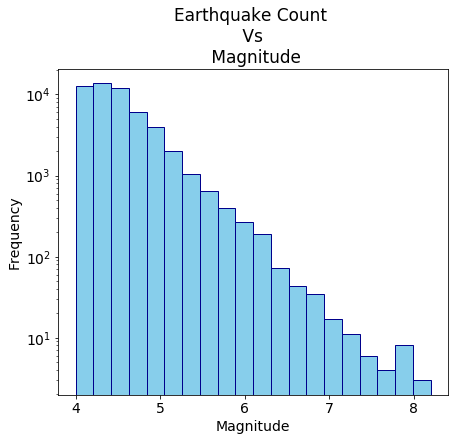

In [80]:
import matplotlib as mp
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(1, 1,figsize=(7,6),sharey=True)

plt.yscale('log')
plt.hist(df['mag'],bins=20,color="skyblue",edgeColor="darkblue")
ax.set_title(str('Earthquake Count \n Vs \n Magnitude'), fontsize=17)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('Magnitude', fontsize=14)
plt.xticks(range(4, 9,1), fontsize=14)  
plt.yticks( fontsize=14) 
plt.show()





### 9) Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) ​Please add labels and colors to the plot.

The below plot that we see seems to have <b>binomial distribution</b>. I can see that there are two peaks in the graphs.
The conclusion that we can draw would be very minor magnitude of earthquake and very major magntude of earthquakes have high depths.

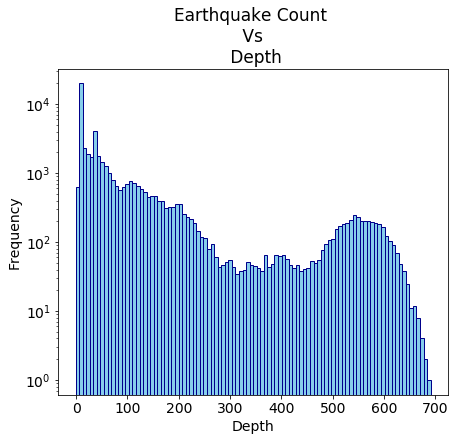

In [81]:
fig, ax = plt.subplots(1, 1,figsize=(7,6),sharey=True)

plt.yscale('log')
plt.hist(df['depth'],color=['skyblue'],bins=100,edgecolor='darkblue')
ax.set_title(str('Earthquake Count \n Vs \n Depth'), fontsize=17)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('Depth', fontsize=14)
plt.xticks( fontsize=14)  
plt.yticks( fontsize=14)
plt.show()

### 10) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. (20 points) ​Please add labels and colors to the plot.

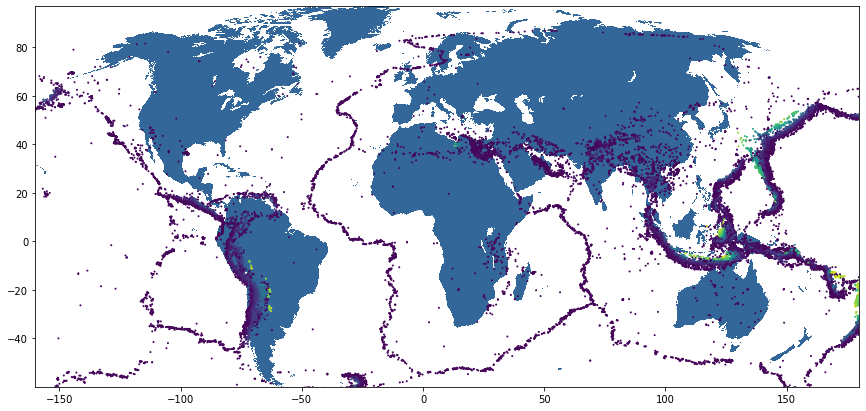

In [17]:
fig, ax = plt.subplots(1, 1,figsize=(15,7),sharey=True)
plt.scatter(x=df['longitude'], y=df['latitude'],c=df['depth'],s=1)
img=plt.imread('maps3.jpg')
plt.imshow(img,zorder=0,extent=[df['longitude'].min()+20,df['longitude'].max(),df['latitude'].min()+20,df['latitude'].max()+10])
plt.show()
#this is a simple map that goes with geopandas


###  11) Using the US package (https://pypi.org/project/us/), clean the dataset you used previously to only have data from the USA .​ You need to create a function that accommodates this. (20 points)


In [7]:
import us as us
def Get_US_States_Data(begin,end,url):
    df=pd.read_csv('data.csv') 
    #Filtering out data for earthquake ONLY
    df=df[df['type']=="earthquake"]
    
    
    temp=df.copy(deep=True)
    
    #String processing to find place as state
    df['place']=df['place'].str.split(',').str[1].str[1:]
    df['place']=df['place'].fillna(temp['place'].str.split('of').str[1])
    df['place']=df['place'].fillna(temp['place'])

    state=[]
    stateAbb=[]
    Territories=[]
    for i in range(0,51) :
        state.append(str(us.states.STATES[i]))
    
    
    for l in range(0,5) :
        Territories.append(str(us.states.TERRITORIES[l]))
    

    for j in range(0,51) :
        stateAbb.append(str(us.states.STATES[j].abbr))
    

    stateAbbdf=pd.DataFrame(stateAbb,columns={'place'})
    statedf=pd.DataFrame(state,columns={'place'})
    Territoriesdf=pd.DataFrame(Territories,columns={'place'})
    
    #filtering the states  
    df1=df[df['place'].isin(statedf.filter(like='place').stack())]
    df2=df[df['place'].isin(stateAbbdf.filter(like='place').stack())]
    df3=df[df['place'].isin(Territoriesdf.filter(like='place').stack())]
    df0=df1.append(df2)
    
    df0=df0.append(df3)
    

    df0['place']=df0['place'].replace(stateAbb,state)

    return df0

begin = datetime.date(2016, 1, 1)
end = datetime.date(2019, 10, 2)
url="https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime="+begin.strftime('%Y-%m-%d')+"&endtime="+end.strftime('%Y-%m-%d')+"&minmagnitude=3"

USdf=Get_US_States_Data(begin,end,url)  


In [83]:
# removing the null values
USdf.isna().sum()
USdf=USdf.fillna(0)


### 12- a) Find the top 10 US states where the strongest earthquakes occurred (10 points)

In [87]:
topdf=USdf.nlargest(120,['mag']).drop_duplicates('place')['place'].to_frame()
topdf.reset_index(level=0, inplace=True)
topdf['place'].to_frame()


,place
0,Alaska
1,Northern Mariana Islands
2,Hawaii
3,California
4,Oregon
5,Puerto Rico
6,Oklahoma
7,Montana
8,Guam
9,Nevada


### 12-b) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (10 points) Please add labels and colors to the plot.

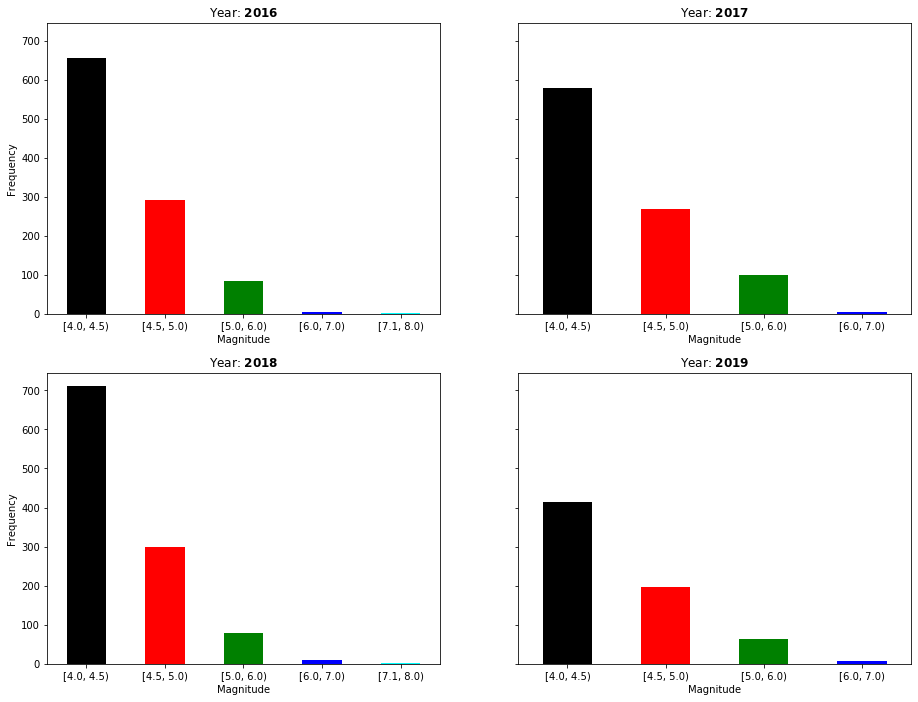

In [88]:
import matplotlib.pyplot as plt
import numpy as np

dfPlotTemp=USdf[['time', 'mag']] 
dfPlotTemp.insert(2,"Year",dfPlotTemp['time'].str[:4])
dfPlot=dfPlotTemp[['Year','mag']]


dfPlot2016= dfPlot.loc[dfPlot['Year'] == '2016']
dfPlot2017= dfPlot.loc[dfPlot['Year'] == '2017']
dfPlot2018= dfPlot.loc[dfPlot['Year'] == '2018']
dfPlot2019= dfPlot.loc[dfPlot['Year'] == '2019']


fig, ax = plt.subplots(2, 2,figsize=(15,10),sharey=True)


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.01, top=0.9)
cut_bins_1 = [4,4.5,5,6,7]
cut_bins_2 = [7.1,8]

dfPlot2016Bin1=pd.cut(dfPlot2016['mag'], bins=cut_bins_1,right=False)
dfPlot2016Bin2=pd.cut(dfPlot2016['mag'], bins=cut_bins_2,right=False)
dfPlot2016Bin=dfPlot2016Bin1.append(dfPlot2016Bin2).dropna()

ax[0, 0] = dfPlot2016Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[0,0])
ax[0, 0].set_title("Year: " + r"$\bf{" + str('2016') + "}$")
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_xlabel('Magnitude')

dfPlot2017Bin1=pd.cut(dfPlot2017['mag'], bins=cut_bins_1,right=False)
dfPlot2017Bin2=pd.cut(dfPlot2017['mag'], bins=cut_bins_2,right=False)
dfPlot2017Bin=dfPlot2017Bin1.append(dfPlot2017Bin2).dropna()
ax[0, 1] = dfPlot2017Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[0,1])
ax[0, 1].set_title("Year: " + r"$\bf{" + str('2017') + "}$")
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_xlabel('Magnitude')

dfPlot2018Bin1=pd.cut(dfPlot2018['mag'], bins=cut_bins_1,right=False)
dfPlot2018Bin2=pd.cut(dfPlot2018['mag'], bins=cut_bins_2,right=False)
dfPlot2018Bin=dfPlot2018Bin1.append(dfPlot2018Bin2).dropna()
ax[1, 0] = dfPlot2018Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[1,0])
ax[1, 0].set_title("Year: " + r"$\bf{" + str('2018') + "}$")
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_xlabel('Magnitude')

dfPlot2019Bin1=pd.cut(dfPlot2019['mag'], bins=cut_bins_1,right=False)
dfPlot2019Bin2=pd.cut(dfPlot2019['mag'], bins=cut_bins_2,right=False)
dfPlot2019Bin=dfPlot2019Bin1.append(dfPlot2019Bin2).dropna()
ax[1, 1] = dfPlot2019Bin.value_counts(sort=True).plot.bar(rot=0,color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax[1,1])
ax[1, 1].set_title("Year: " + r"$\bf{" + str('2019') + "}$")
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_xlabel('Magnitude')

plt.show()

## 12- c) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Overlay a US map on top of this plot to match the locations. (20 points) Please add labels and colors to the plot.


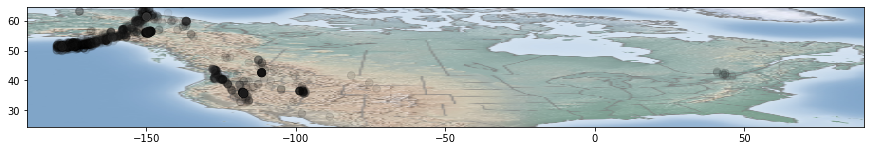

In [220]:
fig, ax = plt.subplots(1, 1,figsize=(15,7),sharey=True)
plt.scatter(x=USdf['longitude'], y=USdf['latitude'],c=USdf['mag'],alpha=0.1,s=60)
img=plt.imread('usmap4.png')
plt.imshow(img,zorder=0,extent=[USdf['longitude'].min()-10,USdf['longitude'].max()-90,\
                                USdf['latitude'].min()+40,USdf['latitude'].max()-5])
plt.show()